In [26]:
import h2o
from h2o.estimators.aggregator import H2OAggregatorEstimator
import matplotlib.pyplot as plt

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
h2o.init()
df = h2o.import_file("../input/real-quad-fields-1-2/real_quad_fields_1_2.csv")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpugrfrtg_
  JVM stdout: /tmp/tmpugrfrtg_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpugrfrtg_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,2 months and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_2zo3xj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
print(df['class_number'].table())

class_number,Count
1,177159
2,183432


In [15]:
# Build an aggregated frame with around 5000 records
agg_frame = H2OAggregatorEstimator(target_num_exemplars = 5000)
agg_frame.train(training_frame=df)
# Use the aggregated model to create a new dataframe using aggregated_frame
small_df = agg_frame.aggregated_frame
small_df_pd = small_df.as_data_frame(use_pandas = True)

aggregator Model Build progress: |████████████████████████████████████████| 100%


Text(0, 0.5, 'zeta_180')

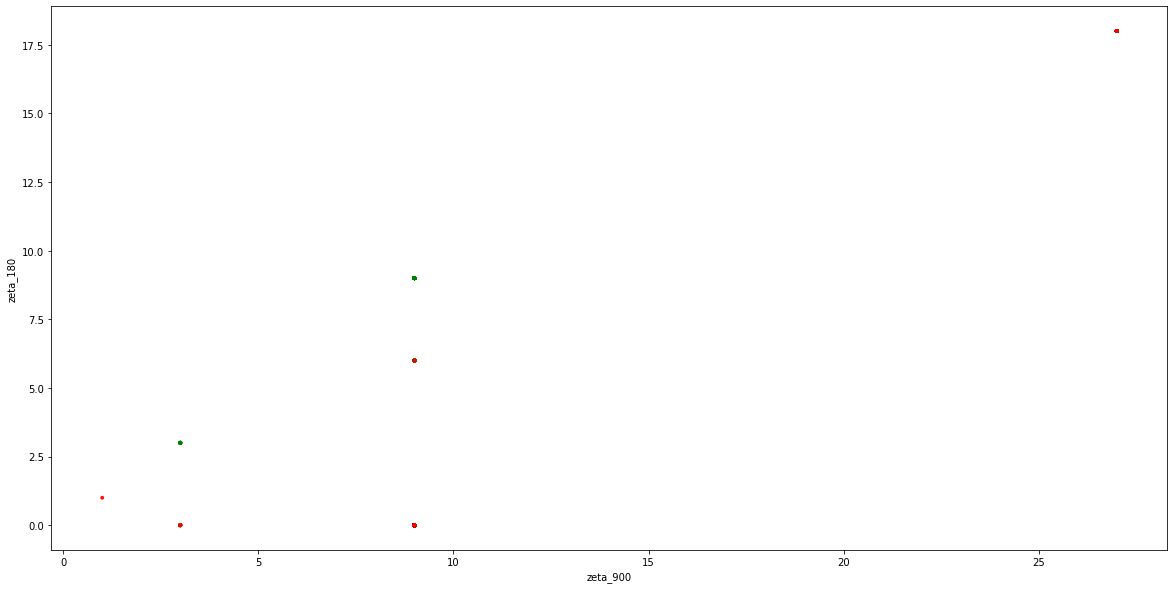

In [27]:
colors = small_df_pd['class_number']
color_map = {1:'red', 2:'green'}
plt.figure(figsize=(20,10))
plt.scatter(small_df_pd.a_900, small_df_pd.a_180, s=8, alpha=0.9, c=small_df_pd.class_number.map(color_map))
plt.xlabel("zeta_900")
plt.ylabel("zeta_180")

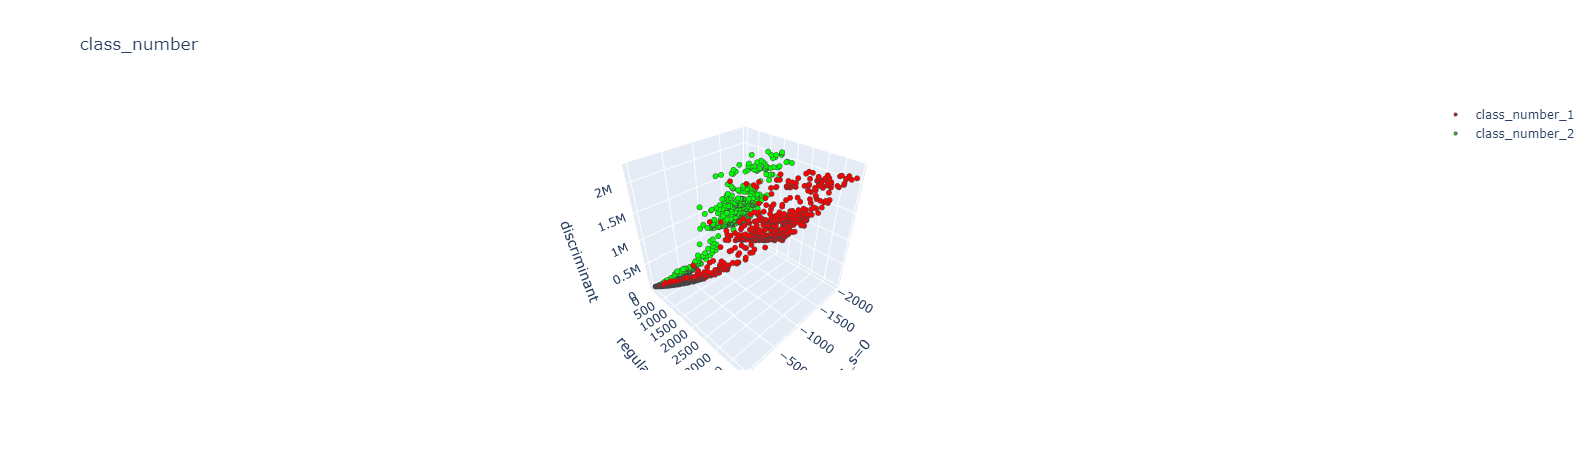

In [31]:
feature1 = 'res_s=0'
feature2 = 'regulator'
feature3 = 'discriminant'

dr1 = go.Scatter3d(
    x=small_df_pd[small_df_pd['class_number'] == 1][feature1],
    y=small_df_pd[small_df_pd['class_number'] == 1][feature2],
    z=small_df_pd[small_df_pd['class_number'] == 1][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=1)),
    name ='class_number_1'
)
dr2 = go.Scatter3d(
    x=small_df_pd[small_df_pd['class_number'] == 2][feature1],
    y=small_df_pd[small_df_pd['class_number'] == 2][feature2],
    z=small_df_pd[small_df_pd['class_number'] == 2][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,255,0)',
                  line=dict(width=1)),
    name ='class_number_2'
)
data = [dr1, dr2]
layout = go.Layout(
    title='class_number',
    scene = dict(
        xaxis = dict(title=feature1),
        yaxis = dict(title=feature2),
        zaxis = dict(title=feature3),)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='class_number')

In [43]:
feature1 = 'a_900'
feature2 = 'a_100'
feature3 = 'a_180'

dr1 = go.Scatter3d(
    x=small_df_pd[small_df_pd['class_number'] == 1][feature1],
    y=small_df_pd[small_df_pd['class_number'] == 1][feature2],
    z=small_df_pd[small_df_pd['class_number'] == 1][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=1)),
    name ='class_number_1'
)
dr2 = go.Scatter3d(
    x=small_df_pd[small_df_pd['class_number'] == 2][feature1],
    y=small_df_pd[small_df_pd['class_number'] == 2][feature2],
    z=small_df_pd[small_df_pd['class_number'] == 2][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,255,0)',
                  line=dict(width=1)),
    name ='class_number_2'
)
data = [dr1, dr2]
layout = go.Layout(
    title='class_number',
    scene = dict(
        xaxis = dict(title=feature1),
        yaxis = dict(title=feature2),
        zaxis = dict(title=feature3),)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='class_number')